# Final Project

### Project Members
- <strong>Huixin Li</strong> (hli5@scu.edu)
- <strong>Iga Opanowicz</strong> (iopanowicz@scu.edu)
- <strong>Niveditha Shanbhag</strong> (nshanbhag@scu.edu)

## <span style="color:blue">**Description** </span>

**Link to dataset: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset**

## Analytics Employee Attrition & Performance

* Employee attrition is defined as the unpredictable and uncontrollable, but normal, reduction of the workforce due to resignations, retirement, sickness, or death. The employee attrition rate measures the number of people who move out of a company and are not replaced.
* 2021 is known as the Great Resignation. Great Resignation is an ongoing economic trend in which employees have voluntarily resigned from their jobs.
* Historically the United States resignation rate has never surpassed 2.4%, in 2021 it has hit around 3%.
* Average cost of employee attrition is 33% of the employee's salary. 
* It takes a new employees between 6-12 months to become a proficient contributor in the new role. 
* The cost, delays in delivering work, and the impact attrition has on other employees' morale is tremendous.
* Employee retention is crucial to a company’s success and the attrition rate is the metric that provides insight into how well company is retaining its employees.
* Having a clear view of employee attrition rate is essential to help understand wherecompany stands in terms of candidate retention.
* In this analysis, we will be focusing on the major factors that contribute to attrition and what can companies do to prevent this 

##  <span style="color:blue">**Loading Python libraries** </span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image
from IPython.core.display import HTML 
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')
#see only one time warning
#warnings.filterwarnings(action='once')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
pd.set_option('display.max_rows', 50)

##  <span style="color:blue">**Loading & Reading the Dataset** </span>

In [7]:
df = pd.read_csv('attrition.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape

(1470, 35)

In [10]:
df.isna().sum().sum()

0

<div class="alert alert-block alert-success"> There are no Nan values in our dataset. </div>

In [11]:
(df.Attrition=='Yes').sum()

237

In [12]:
(df.Attrition=='No').sum()

1233

In [13]:
(df.Gender=='Female').sum()

588

In [14]:
(df.Gender=='Male').sum()

882

<div class="alert alert-block alert-success"> But our dataset shows a bit imbalanced on gender and attrition (Y target) </div>

##  <span style="color:blue">**Data Set Description/Data Dictionary** </span>

The **IBM HR Analytics Employee Attrition & Performance** - focuses on predicting employee attrition. The data shows factors that lead to employee attrition and explores how certain aspects contribute to employees choosing to stay or leave the company such as distance from home or average monthly income. The data consists of 1470 rows and 35 columns.

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- <strong>Age</strong>: employee age Numerical
- <strong>Attrition</strong>: resigned - Yes or No Categorical
- <strong>BusinessTravel</strong>: how frequently do they travel Categorical
- <strong>DailyRate</strong>: daily salary rate Numerical
- <strong>Department</strong>: department they work in Categorical
- <strong>DistanceFromHome</strong>: commute distance Numerical
- <strong>Education</strong>: (1-'Below College',2-'College',3-'Bachelor',4-'Master',5-'Doctor') Numerical
- <strong>EducationField</strong>: Field they studied Categorical
- <strong>EmployeeCount</strong>: count of employees 
- <strong>EmployeeNumber</strong>: assigned employee number
- <strong>EnvironmentSatisfaction</strong>: (1- Low to 4-Very High) Numerical
- <strong>Gender</strong>: Female or Male Categorical
- <strong>HourlyRate</strong>: hourly salary rate Numerical
- <strong>JobInvolvement</strong>: (1- Low to 4-Very High) Numerical
- <strong>JobLevel</strong>: level number Categorical
- <strong>JobRole</strong>: current role Categorical
- <strong>JobSatisfaction</strong>: (1- Low to 4-Very High) Numerical
- <strong>MaritalStatus</strong>: Single or Married Categorical
- <strong>MonthlyIncome</strong>: monthly income Numerical
- <strong>MonthlyRate</strong>: monthly rate Numerical
- <strong>NumCompaniesWorked</strong>: how many companies they worked at Numerical
- <strong>Over18</strong>: Y or N Categorical
- <strong>OverTime</strong>: Yes or No Categorical
- <strong>PercentSalaryHike</strong>: salary increase in % Numerical
- <strong>PerformanceRating</strong>: (1-'Low',2-'Good',3-'Excellent',4-'Outstanding') Numerical
- <strong>RelationshipSatisfaction</strong>: (1- Low to 4-Very High) Numerical
- <strong>StandardHours</strong>: what are their standard hours Numerical
- <strong>StockOptionLevel</strong>: level they get stock options at Numerical
- <strong>TotalWorkingYears</strong>: total of years worked Numerical
- <strong>TrainingTimesLastYear</strong>: how much training they got last year Numerical
- <strong>WorkLifeBalance</strong>:(1-'Bad',2-'Good',3-'Better',4-'Best') Numerical
- <strong>YearsAtCompany</strong>: years worked at current company Numerical
- <strong>YearsInCurrentRole</strong>: time in role Numerical
- <strong>YearsSinceLastPromotion</strong>: time since promotion Numerical
- <strong>YearsWithCurrManager</strong>: time working with current manager Numerical

<div class="alert alert-block alert-success"> Our dataset has 25 numerical and 10 categorical. </div>

##  <span style="color:blue">**Data Cleaning** </span>

In [16]:
df1 = df.copy()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
df1.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df1.Attrition = df1.Attrition.apply(lambda x: 1.0 if x=='Yes' else 0.0)

Use function to check if any columns have only one type of value.

In [20]:
def get_unique_type(col):
    if col.nunique()==1:
        print (col.name)

Drop columns with only one type of value and drop EmployeeNumber because we don't need Employee ID.

In [21]:
df1.apply(get_unique_type)[:0]

EmployeeCount
Over18
StandardHours


Series([], dtype: object)

In [22]:
df1.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

Converted columns with ‘Yes’ and ‘No’ values to 1 and 0

In [23]:
df1.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df1.OverTime = df1.OverTime.apply(lambda x: 1.0 if x=='Yes' else 0.0)

In [25]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df1['Female'] = df1.Gender.apply(lambda x: 1.0 if x=='Female' else 0.0)

Drop the column Gender.

In [27]:
df1.drop(columns='Gender', inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

<div class="alert alert-block alert-success"> Our data cleaning is complete. There are no Nan values and we dropped the columns we won't need. </div>

##  <span style="color:blue">**Correlation: get prepared for findings** </span>

Overall Attrition Rate

<AxesSubplot:ylabel='Attrition'>

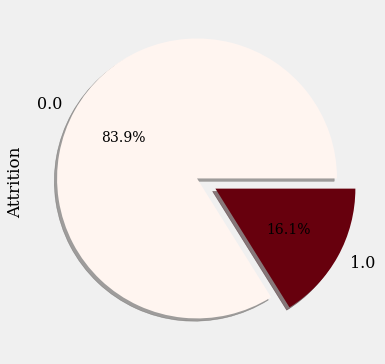

In [29]:
df1.groupby('Attrition')['Attrition'].count().\
            plot(kind='pie',figsize=(10,6),cmap="Reds", autopct='%1.1f%%', explode=[0.05, 0.1], shadow=True)

In [30]:
df1.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Female
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.036311
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.029453
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.011716
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.001851
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.016547
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.000508
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.007782,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,0.000478
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.003507,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.017960
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,0.000544,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,0.039403
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.024539,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.033252


In [31]:
cor = df1.corr()
cor.stack()

Age     Age                        1.000000
        Attrition                 -0.159205
        DailyRate                  0.010661
        DistanceFromHome          -0.001686
        Education                  0.208034
                                     ...   
Female  YearsAtCompany             0.029747
        YearsInCurrentRole         0.041483
        YearsSinceLastPromotion    0.026985
        YearsWithCurrManager       0.030599
        Female                     1.000000
Length: 676, dtype: float64

Remove the correlations equal to 1; then, pick one correlation every two for both positive and negative correlations.

In [32]:
cor[cor < 1].stack().nlargest(20)[::2]

JobLevel            MonthlyIncome              0.950300
                    TotalWorkingYears          0.782208
PercentSalaryHike   PerformanceRating          0.773550
MonthlyIncome       TotalWorkingYears          0.772893
YearsAtCompany      YearsWithCurrManager       0.769212
                    YearsInCurrentRole         0.758754
YearsInCurrentRole  YearsWithCurrManager       0.714365
Age                 TotalWorkingYears          0.680381
TotalWorkingYears   YearsAtCompany             0.628133
YearsAtCompany      YearsSinceLastPromotion    0.618409
dtype: float64

In [33]:
cor[cor < 1].stack().nlargest(10)

JobLevel              MonthlyIncome           0.950300
MonthlyIncome         JobLevel                0.950300
JobLevel              TotalWorkingYears       0.782208
TotalWorkingYears     JobLevel                0.782208
PercentSalaryHike     PerformanceRating       0.773550
PerformanceRating     PercentSalaryHike       0.773550
MonthlyIncome         TotalWorkingYears       0.772893
TotalWorkingYears     MonthlyIncome           0.772893
YearsAtCompany        YearsWithCurrManager    0.769212
YearsWithCurrManager  YearsAtCompany          0.769212
dtype: float64

In [34]:
cor[cor < 1].stack().nsmallest(20)[::2]

Attrition           TotalWorkingYears      -0.171063
                    JobLevel               -0.169105
                    YearsInCurrentRole     -0.160545
                    MonthlyIncome          -0.159840
Age                 Attrition              -0.159205
Attrition           YearsWithCurrManager   -0.156199
                    StockOptionLevel       -0.137145
                    YearsAtCompany         -0.134392
                    JobInvolvement         -0.130016
NumCompaniesWorked  YearsAtCompany         -0.118421
dtype: float64

The least significant correlations that we won't investigate

In [35]:
cor[cor<1].stack().abs().nsmallest(20)[::2]

OverTime                  StockOptionLevel            0.000449
DailyRate                 PerformanceRating           0.000473
HourlyRate                Female                      0.000478
EnvironmentSatisfaction   Female                      0.000508
JobLevel                  OverTime                    0.000544
JobSatisfaction           MonthlyRate                 0.000644
RelationshipSatisfaction  YearsWithCurrManager        0.000867
TotalWorkingYears         WorkLifeBalance             0.001008
EnvironmentSatisfaction   JobLevel                    0.001212
HourlyRate                RelationshipSatisfaction    0.001330
dtype: float64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

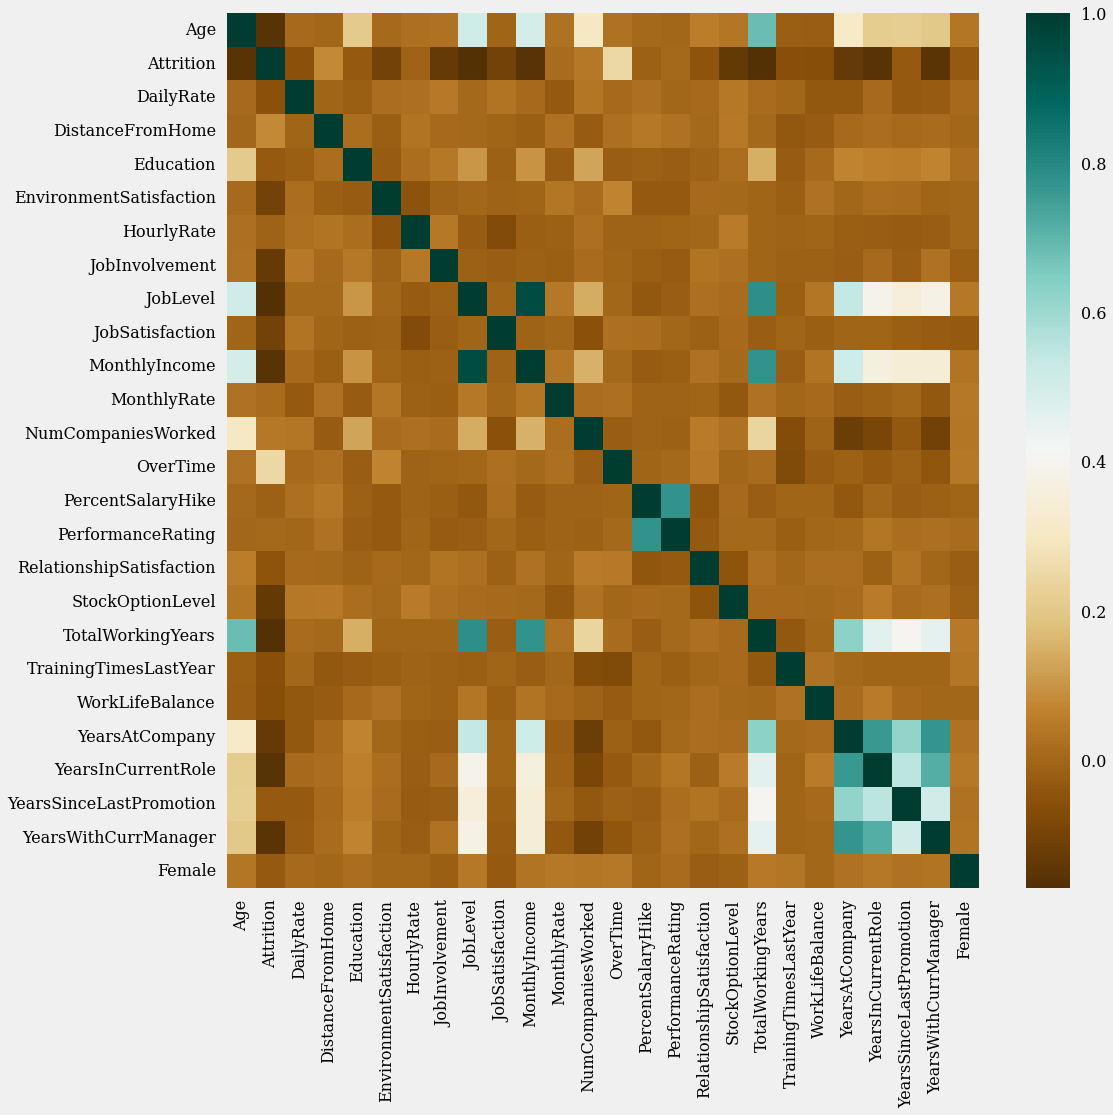

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap='BrBG')

As shown above heatmap, the more blue means high correlation, the more brown means weak correlation.<br>
If we look at Attrition, we can see OverTime and DistanceFromHome have pretty strong correlation. So we decide to start from here.

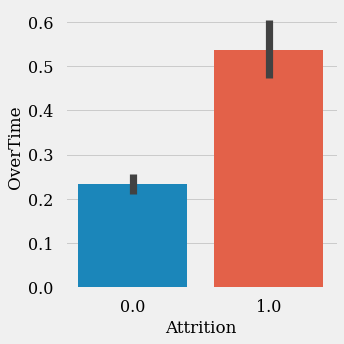

In [37]:
sns.catplot(x='Attrition', y='OverTime', data=df1, kind='bar')

As bar chart shows above that people who have resigned do have higher OverTime compared with who haven't.

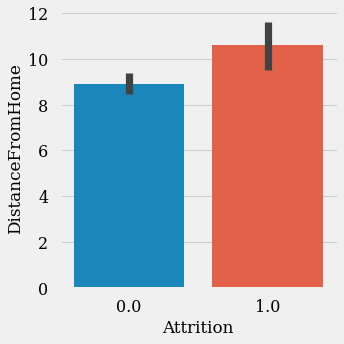

In [38]:
sns.catplot(y='DistanceFromHome', x='Attrition', data=df1, kind='bar')

As bar chart shows above that people who have resigned do live farther compared with who haven't.

#  <span style="color:blue">**More Findings** </span>

# 1st Finding: Classfiers Decision Tree Picks

In [39]:
df2 = df1.copy()

In [40]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Female'],
      dtype='object')

In [41]:
df2 = pd.get_dummies(df2, columns=['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction',\
                                   'JobRole', 'JobLevel',  'MaritalStatus' ])

In [42]:
X = df2.drop('Attrition',axis=1)

In [43]:
Y = df2.Attrition

In [44]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [45]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

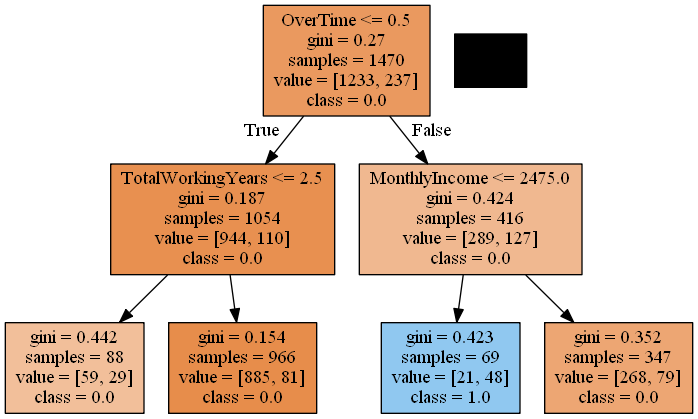

In [46]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in np.sort(Y.unique())]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

<div class="alert alert-block alert-success"> In this chart, we can see that decision tree pick overtime, total working years and monthly income as classifiers. On left side of the tree, people don’t overtime, and right side is people overtime.  </div>

## Left side of the tree
## figure 1: 

In [47]:
df2['discretized_Work_Yrs_EF'] = pd.qcut(df2.TotalWorkingYears, 12, duplicates='drop')

We use 12 as bin number is because 2.4 will be shown on the edge of the first of second bin. And this matches what decision tree picks.

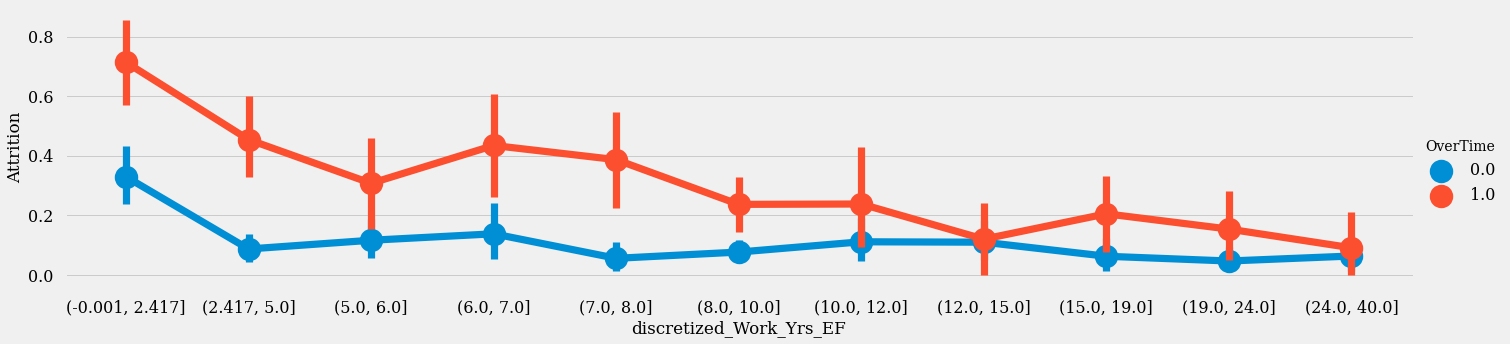

In [48]:
sns.catplot(x='discretized_Work_Yrs_EF', y='Attrition', hue='OverTime', data=df2, kind='point', aspect=4)

1. In the line chart, the blue line means people don’t overtime. <br>
2. Remember that decision trees tells us that people with more than 2.5 working years is less likely to leave and we have better gini score here. <br>
3. In the chart, we can see that attrition is lower after the first bucket, which starts from 2.4. <br>
4. This graph also shows that whether people overtime or not, the longer working years the less likely to leave. 


## Right side of the tree
## figure 2: 

In [49]:
df2['discretized_M_Income_EF'] = pd.qcut(df2.MonthlyIncome, 7)

In [50]:
gr = df2.groupby(['OverTime','discretized_M_Income_EF'])\
    ['Attrition'].mean()

<AxesSubplot:xlabel='discretized_M_Income_EF', ylabel='OverTime'>

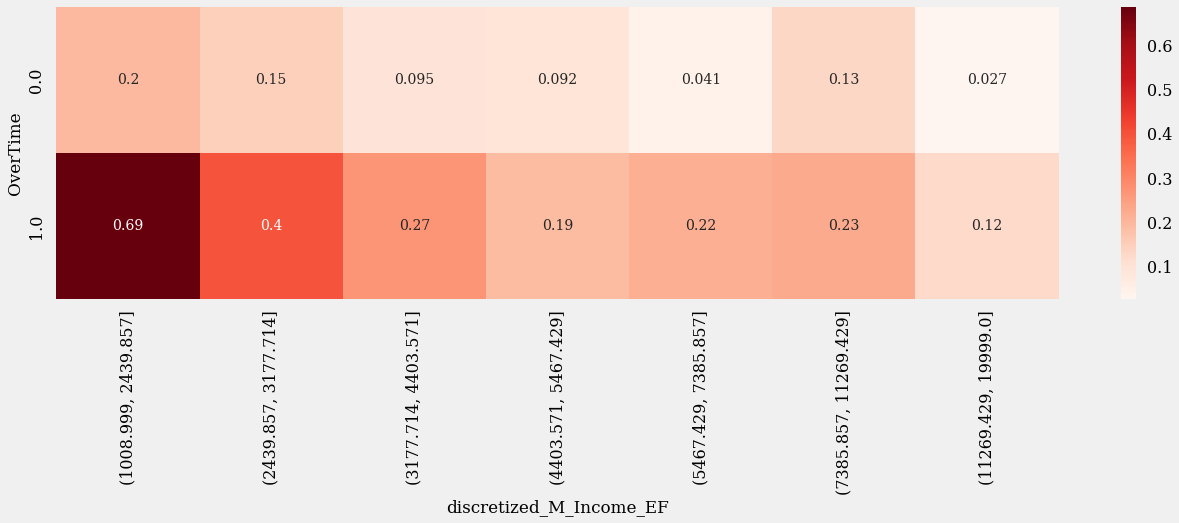

In [51]:
sns.heatmap(gr.unstack(),annot=True,cmap='Reds')
plt.gcf().set_size_inches(20,5)


1. Decision trees tells us that people who overtime and have salary lower than 2475 is more likely to leave while people have higher salary don’t. <br>
2. The heap map reflects this finding. If you look at this dark red block, this means people who overtime and with salary below 2439 have the highest attrition rate. 

Since we discretized the salary, we decide to dig deeper. <br>
1. First we compared it with gender, because we wonder if male and female have different attrition rate. 
2. As we can see that among all bins males have higher attrition except for the second bin where salary is between 2400-3200. <br>
We wonder why? Do females underpay in this particular group?


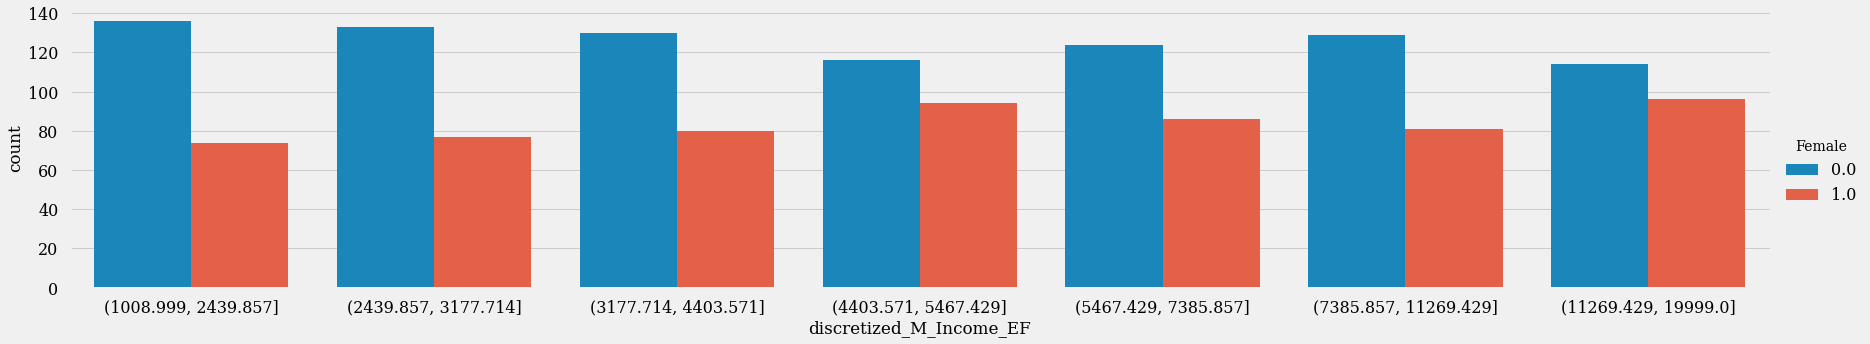

In [52]:
sns.catplot(x='discretized_M_Income_EF',hue='Female', data=df2, kind='count', aspect=5)

We shrink our data and set the salary range between 2400 and 3200. <br>

In [53]:
df4 = df1[(df1.MonthlyIncome > 2400) & (df1.MonthlyIncome < 3200)]

1. First we calculate the average salary among male and female. 

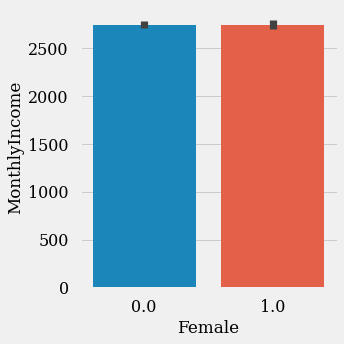

In [54]:
sns.catplot(x='Female',y='MonthlyIncome', data=df4, kind='bar', aspect=1)

Female actually are paid equally to males in this group. <br>
So what’s other reasons for contributing female high attrition rate? 

2. Second we investigate marital status. 

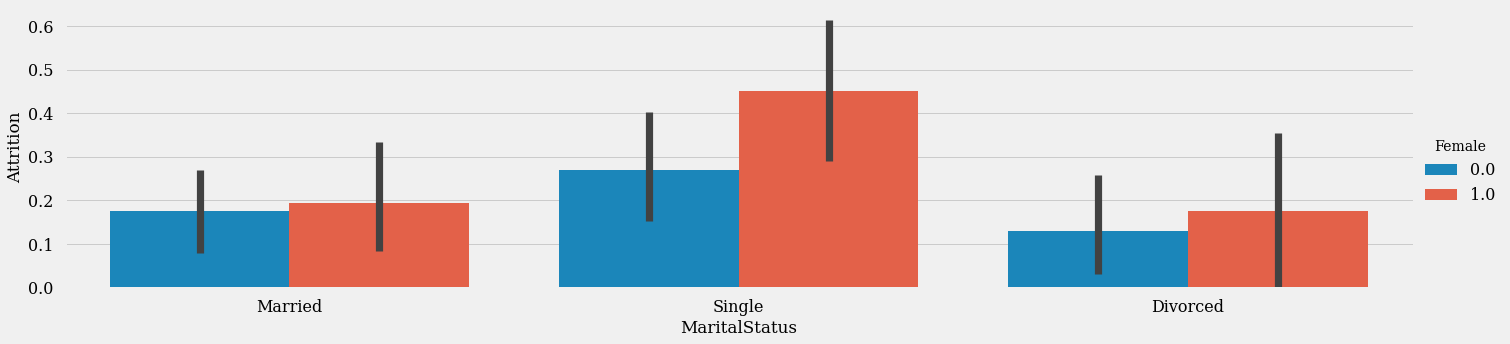

In [55]:
sns.catplot(x='MaritalStatus', y='Attrition',hue='Female', data=df4, kind='bar', aspect=4)

It turns out that within this pay range, more single female in this group. <br>
This is quite fair, because when you are single, you don’t consider stable or settle down, all you want adventure. so it’s ppossilbe to move around different cities and jump between companies. <br>Its fair and not surprising.

3. Third we look into their education field. <br>

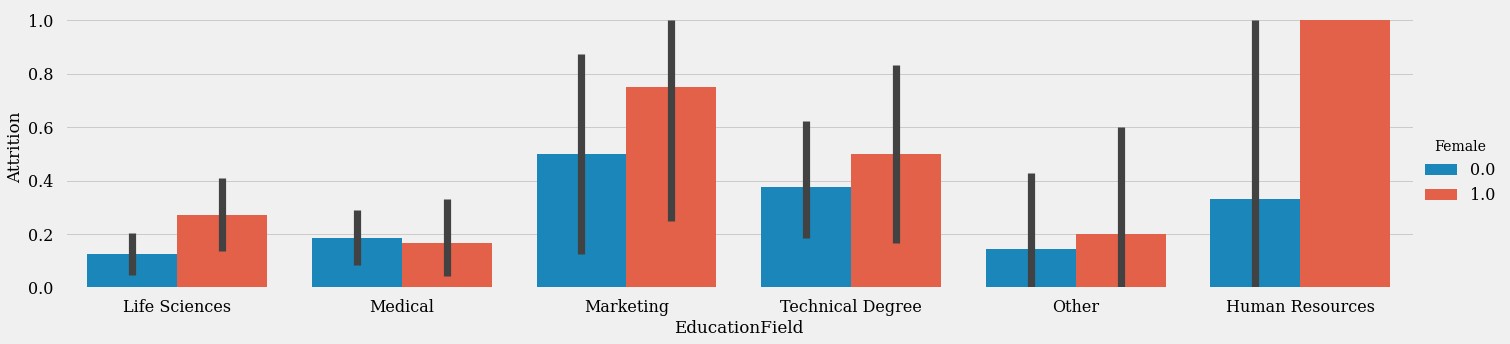

In [56]:
sns.catplot(x='EducationField', y='Attrition',hue='Female', data=df4, kind='bar', aspect=4)

It shows that within this range, females with HR degree has higher attrition. <br>
Based on reality, we know that most employees from HR are actually contractors. This may causes high attrition rate for people with HR degree.

4. Forth we compare with their education level. <br>
1 is below college and 5 is doctor. 

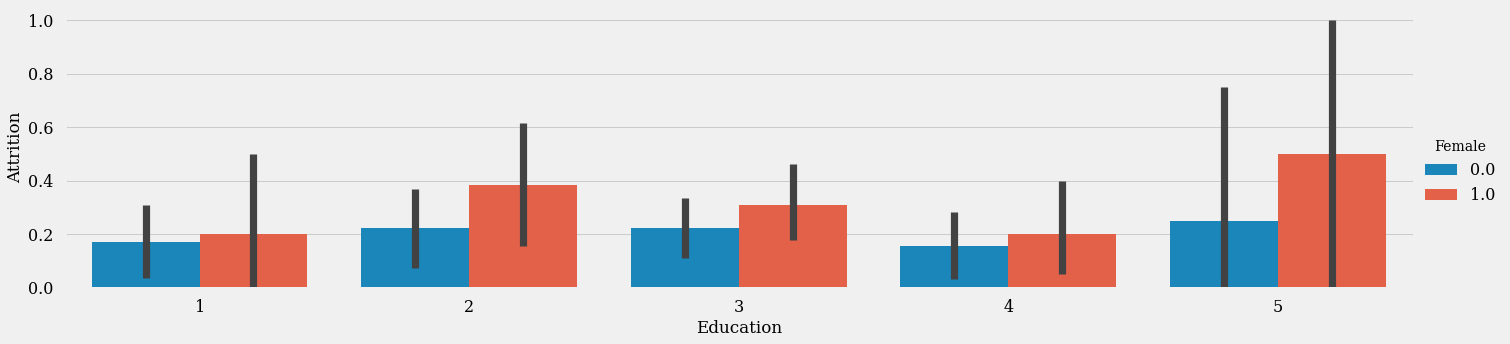

In [57]:
sns.catplot(x='Education', y='Attrition',hue='Female', data=df4, kind='bar', aspect=4)

So this graph above tells us that within this salary range, more phd leave. <br>
We think this is one of major contributors for the high attrition rate within this salary range. <br>
Phd employees think they are underpaid, so they leave the company. 

5. Fifth As inspired during our presention time, we just added another graph to compare what education level for HR degree employees.

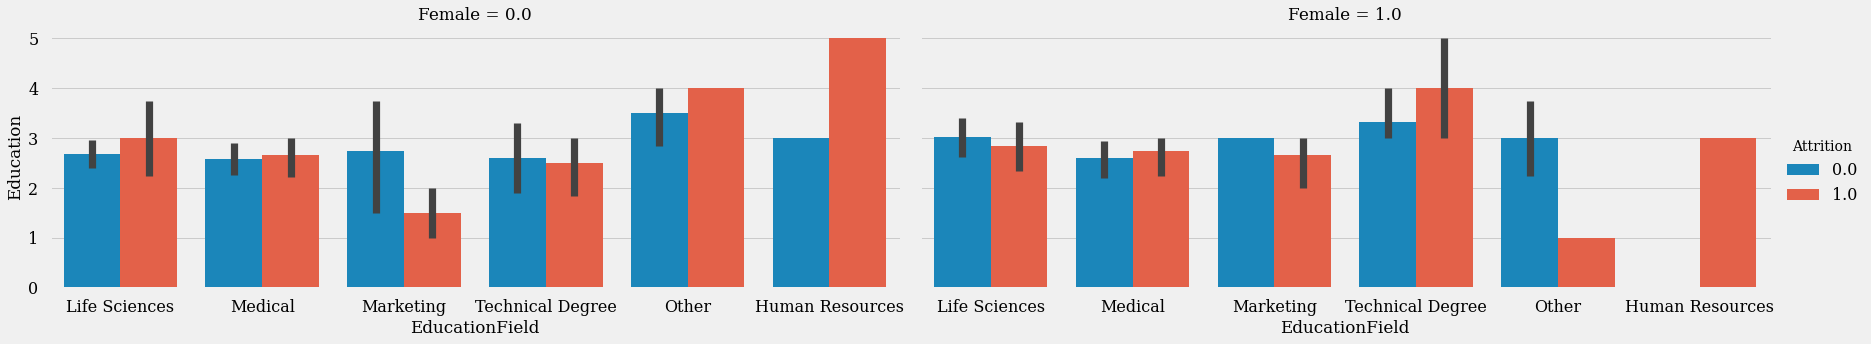

In [58]:
sns.catplot(x='EducationField', y='Education',hue='Attrition', col='Female', data=df4, kind='bar', aspect=2.5)

In the above right graph, we can see for female employees who leave the company, HR degree holder has education level on average 3. <br>
Suprisingly that for male employees who leave the company, their education level are 5 which is the highest. 

6. Lastly, we compared with business travel.

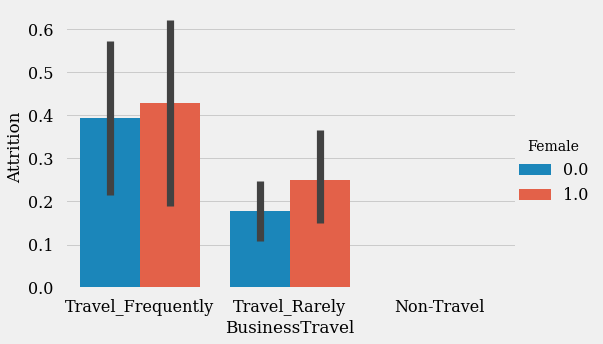

In [59]:
sns.catplot(x='BusinessTravel', y='Attrition',hue='Female', data=df4, kind='bar', aspect=1.5)

So this tells us that within this low salary range, business travel is also a contributor for the high attrition rate.<br>
Maybe sales people don’t get fair incentives, so they leave the company. 

## 1st Finding Conclusion:

<div class="alert alert-block alert-success"> 
From decision tree: <br>
1. People who don't have OverTime in job is more likely to leave when their working year is lower than 2.5.
2. For people do have overtime on job, they are more likely to resign when their monthly income is lower than 2473.

From Monthly income: <br>
1. Females with monthly income between $2400-$3200, are more likely to leave. 
2. And the reasons contributing to their leave are marital status, education field, education level, travel frequency. 
<div>

## Suggestions and Managerial Insights:

1. For employees who travel frequently and are paid at a lower rate, we suggest adding an incentive structure to help retain them and compensate them for the travel time.
2. Management needs to review salaries of employees with PhD and increase their salaries


## 2nd Finding: Comparison of factors between employees who left company to those still employed 

In [60]:
df3=df1.copy()

### So lets take only the most necessary columns for our comparison

In [61]:
employee_data = df3[["Age",
                        "Attrition",
                        "BusinessTravel",
                        "Department",
                        "DistanceFromHome",
                        "Education",
                        "EducationField",
                        "OverTime",
                        "JobInvolvement",
                        "JobRole",
                        "PercentSalaryHike",
                        "JobSatisfaction",
                        "MonthlyIncome",
                         "WorkLifeBalance",
                        "PerformanceRating",
                         "Female",
                        "YearsAtCompany",
                        "YearsInCurrentRole",
                        "YearsSinceLastPromotion"]]
employee_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,OverTime,JobInvolvement,JobRole,PercentSalaryHike,JobSatisfaction,MonthlyIncome,WorkLifeBalance,PerformanceRating,Female,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1.0,Travel_Rarely,Sales,1,2,Life Sciences,1.0,3,Sales Executive,11,4,5993,1,3,1.0,6,4,0
1,49,0.0,Travel_Frequently,Research & Development,8,1,Life Sciences,0.0,2,Research Scientist,23,2,5130,3,4,0.0,10,7,1
2,37,1.0,Travel_Rarely,Research & Development,2,2,Other,1.0,2,Laboratory Technician,15,3,2090,3,3,0.0,0,0,0
3,33,0.0,Travel_Frequently,Research & Development,3,4,Life Sciences,1.0,3,Research Scientist,11,3,2909,3,3,1.0,8,7,3
4,27,0.0,Travel_Rarely,Research & Development,2,1,Medical,0.0,3,Laboratory Technician,12,2,3468,3,3,0.0,2,2,2


#### Out of all the columns chosen, Job involement, Job satisfaction and performance rating may affect the attrition rate the most

In [62]:
y = ["JobInvolvement", "JobSatisfaction", "PerformanceRating"]

for x in y:
    employee_data[x].replace({1 : "Low",
                                    2 : "Medium",
                                    3 : "High",
                                    4 : "Very High"}, inplace = True)

#### From the above, we have done a replacement/mapping of the numerical to the range between Low to Very High

Text(0.5, 1.0, 'Age of Employees')

Text(0, 0.5, '')

Text(0.5, 0, 'Age in Years')

Text(45, 90, 'Avg age is 37 years')

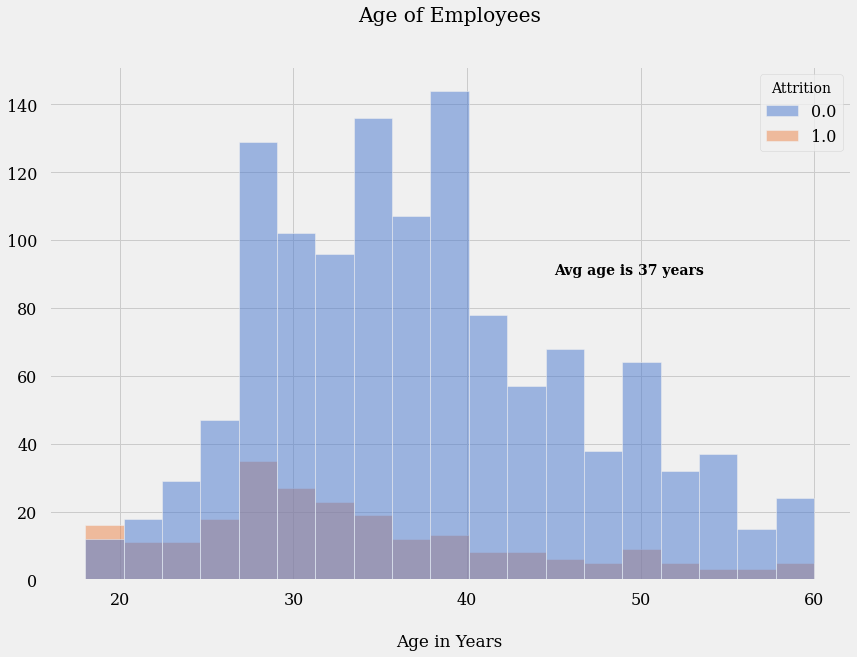

In [63]:
ax = sns.histplot(data = employee_data,
            x = "Age",
            hue = "Attrition",
            palette = "muted")

ax.set_title("Age of Employees", pad = 45)
ax.set_ylabel(None)
ax.set_xlabel("Age in Years", labelpad = 25)

plt.text(x = 45, y = 90, s = "Avg age is 37 years", fontweight = 'semibold')

#### From the above graph, it shows that employees less than 40 years old has a higher proportion of resignation rate compared to other age groups of above 40 years old

### To create a function to compare Job satisfaction, Job Involvement and Performance Rating by attrition

In [64]:
def plot_stats(column, title, label):
    
    fig, ax = plt.subplots(1,2, figsize = (20, 9))

    sns.countplot(ax = ax[0],
                 data = employee_data.loc[employee_data.Attrition == 1.0],
                 x = column, order=['Low', 'Medium', 'High', 'Very High'])

    sns.countplot(ax = ax[1], 
                 data = employee_data.loc[employee_data.Attrition == 0.0],
                 x = column,
                 order = ['Low', 'Medium', 'High', 'Very High'])

    fig.suptitle(title, fontsize = 25, y = 1.05)
    ax[0].set_title("Left Company", pad = 35)
    ax[1].set_title("Still Employed", pad = 35)

    for i in [0,1]:
        ax[i].set_ylabel(None)
        ax[i].set_xlabel(label, labelpad = 20)
        

### To compare Job satisfaction by Attrition

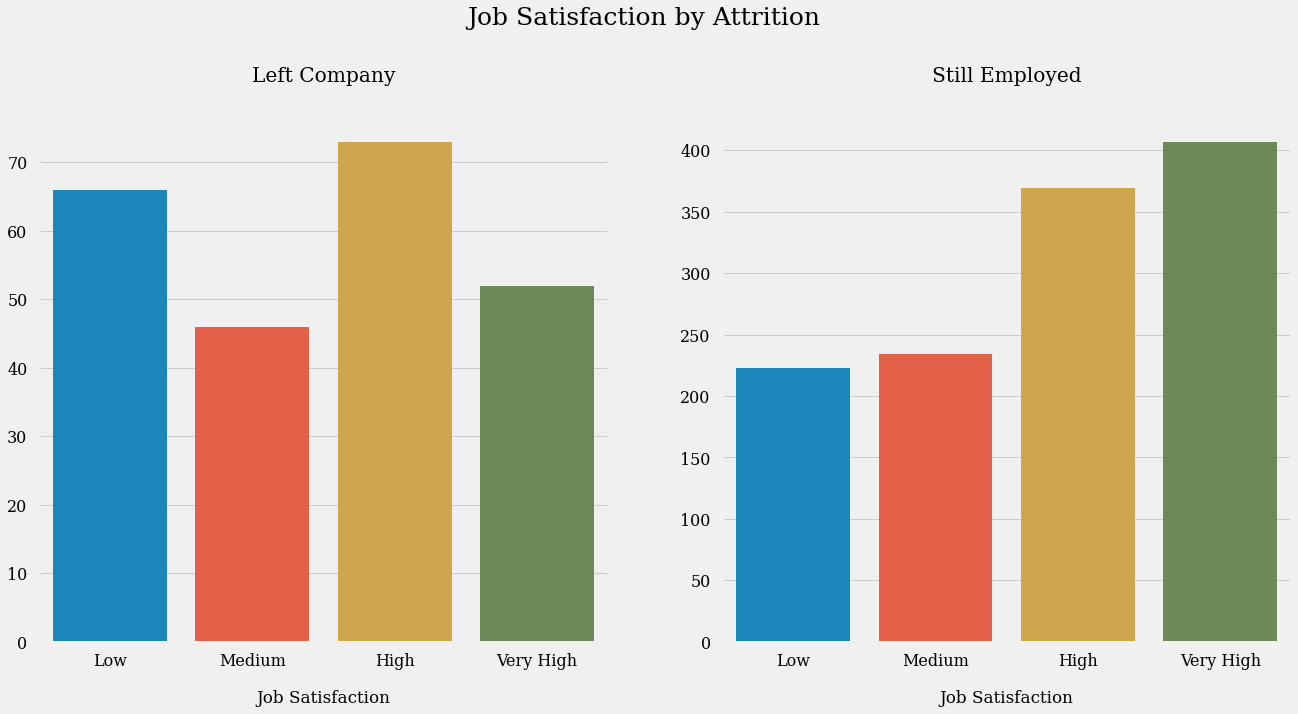

In [65]:
#Passing the parameters in to plot the graph
plot_stats("JobSatisfaction", "Job Satisfaction by Attrition", "Job Satisfaction")

#### Proportionized Job Satisfaction data between employees who left the company and employees still with company

<AxesSubplot:xlabel='JobSatisfaction', ylabel='proportion'>

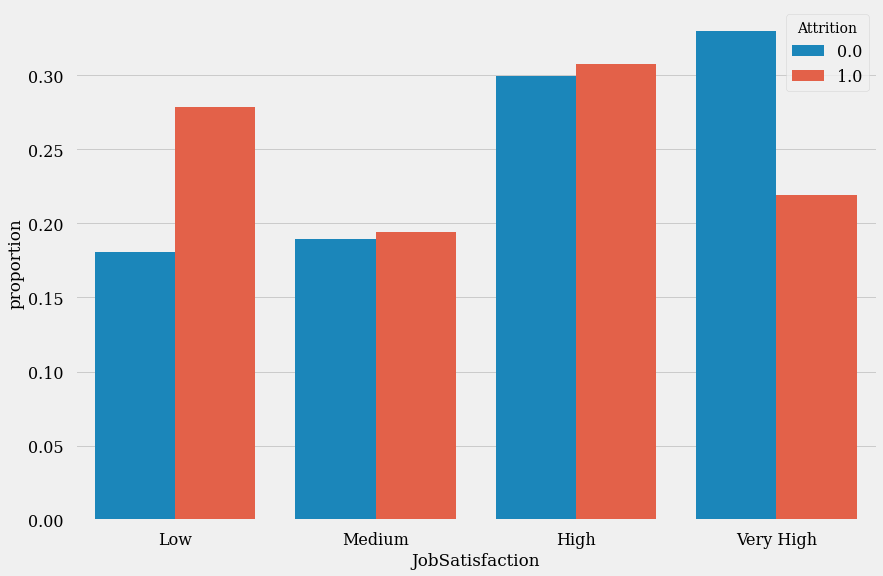

In [106]:
df = employee_data

x, y, hue = "JobSatisfaction", "proportion", "Attrition"
hue_order = [0,1]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=['Low', 'Medium', 'High', 'Very High']))

### To compare Job Involvement by Attrition

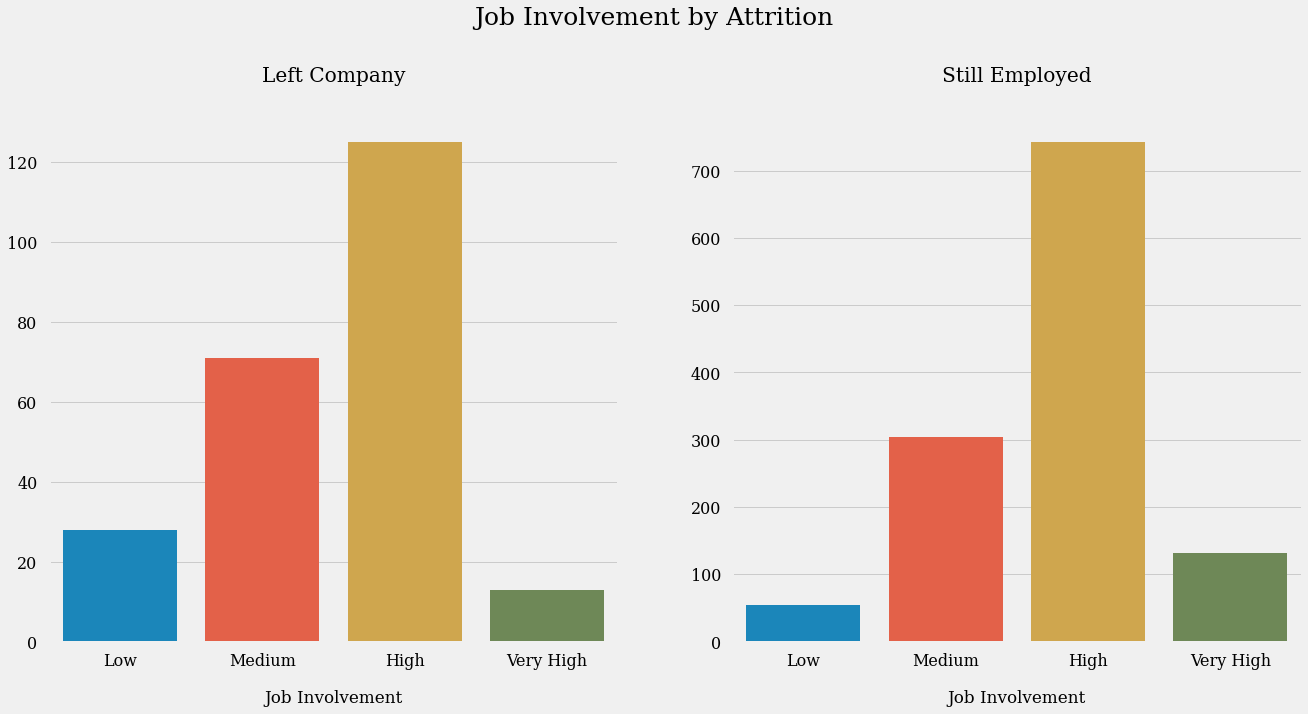

In [109]:
#Passing the parameters in to plot the graph
plot_stats("JobInvolvement", "Job Involvement by Attrition", "Job Involvement")

#### Proportionized Job Involvement data between employees who left the company and employees still with company

<AxesSubplot:xlabel='JobInvolvement', ylabel='proportion'>

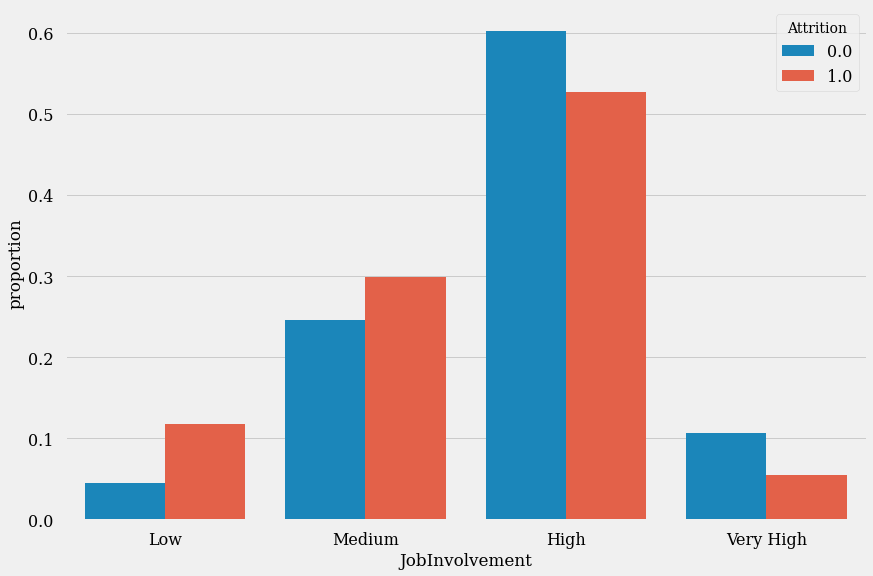

In [111]:
df = employee_data

x, y, hue = "JobInvolvement", "proportion", "Attrition"
hue_order = [0,1]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=['Low', 'Medium', 'High', 'Very High']))

### To compare Performance Rating by attrition

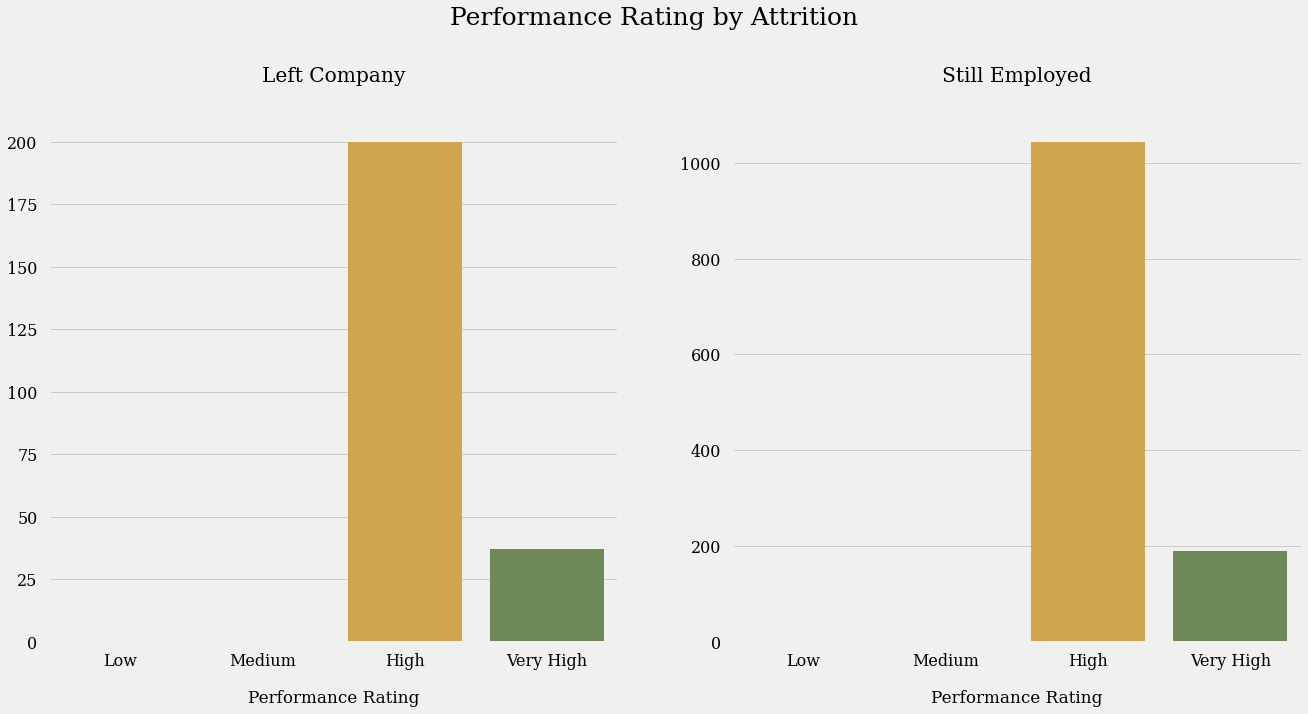

In [112]:
#Passing the parameters in to plot the graph
plot_stats("PerformanceRating", "Performance Rating by Attrition", "Performance Rating")

#### Proportionized Performance Rating data between employees who left the company and employees still with company

<AxesSubplot:xlabel='PerformanceRating', ylabel='proportion'>

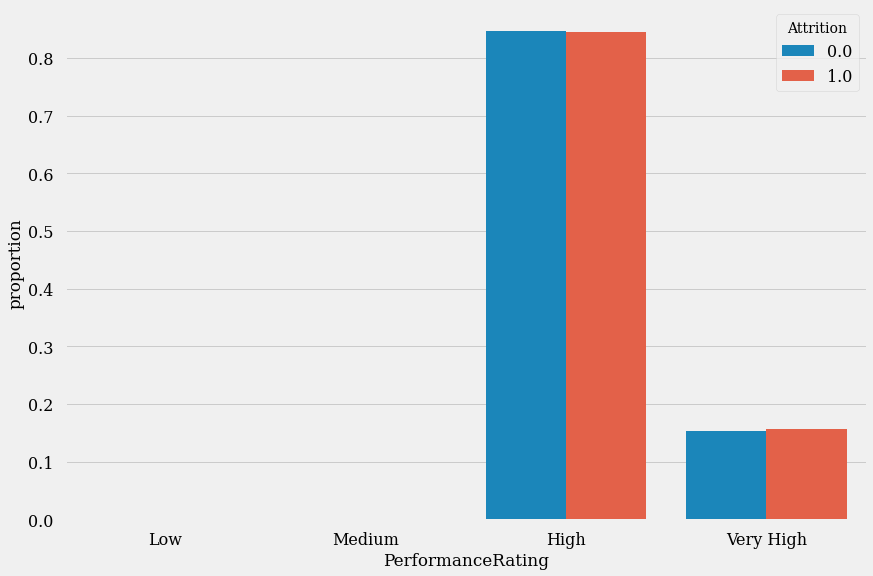

In [108]:
df = employee_data

x, y, hue = "PerformanceRating", "proportion", "Attrition"
hue_order = [0,1]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=['Low', 'Medium', 'High', 'Very High']))

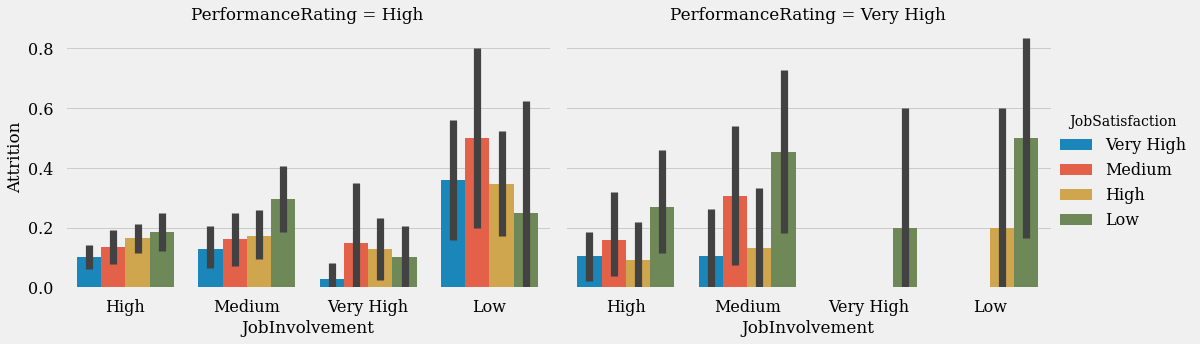

In [71]:
sns.catplot(x='JobInvolvement', y='Attrition', col='PerformanceRating', hue='JobSatisfaction', \
            data=employee_data,kind='bar',aspect=1.5)

### The above graph shows the overall view and relation between the job involvement, performance rating, attrition and job satisfaction

### To create a function to compare the factors of attrition rate by Job role 

In [72]:
def percent_attrition(column, label):
    column_df = employee_data.loc[employee_data[column] == label]
    index  = column_df.index
    att_df = column_df.loc[column_df.Attrition == 1.0]
    att_index = att_df.index
    return (len(att_index) / len(index)) * 100
    

In [73]:
employee_data.loc[employee_data.Department == "Res"].JobRole.unique()

array([], dtype=object)

<AxesSubplot:xlabel='count', ylabel='JobRole'>

Text(0.5, 1.0, 'Attrition by Job Role')

Text(0, 0.5, '')

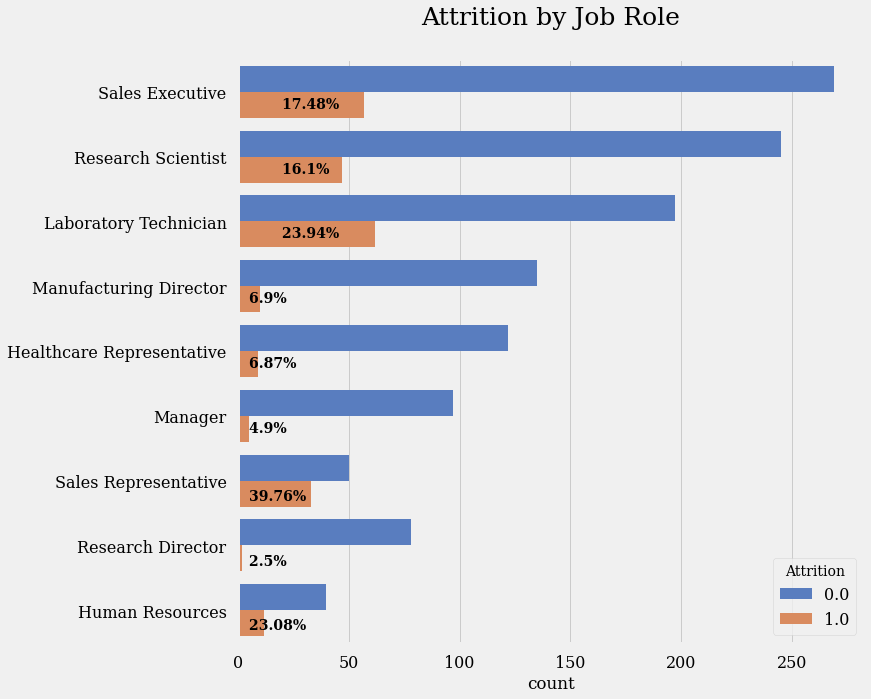

In [74]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))

sns.countplot(data = employee_data,
            y = "JobRole",
            hue = "Attrition",
            palette = "muted")

ax.set_title("Attrition by Job Role", pad = 35, fontsize = 25)
ax.set_ylabel(None)

def plot_per(column, label, x, y):
    string = np.str(np.round(percent_attrition(column, label),2)) + "% "
    plt.text(x = x, y = y, s = string, fontweight = "semibold")
    
plot_per("JobRole", "Sales Executive", 20, 0.25)
plot_per("JobRole", "Research Scientist", 20, 1.25)
plot_per("JobRole", "Laboratory Technician", 20, 2.25)
plot_per("JobRole", "Manufacturing Director", 5, 3.25)
plot_per("JobRole", "Healthcare Representative", 5, 4.25)
plot_per("JobRole", "Manager", 5, 5.25)
plot_per("JobRole", "Sales Representative", 5, 6.3)
plot_per("JobRole", "Research Director", 5, 7.3)
plot_per("JobRole", "Human Resources", 5, 8.3)

##### From the above job role, we can see that the top 3 attrition rate by job role includes Sales Representative, Laboratory technician and Human Resources

<AxesSubplot:xlabel='JobRole'>

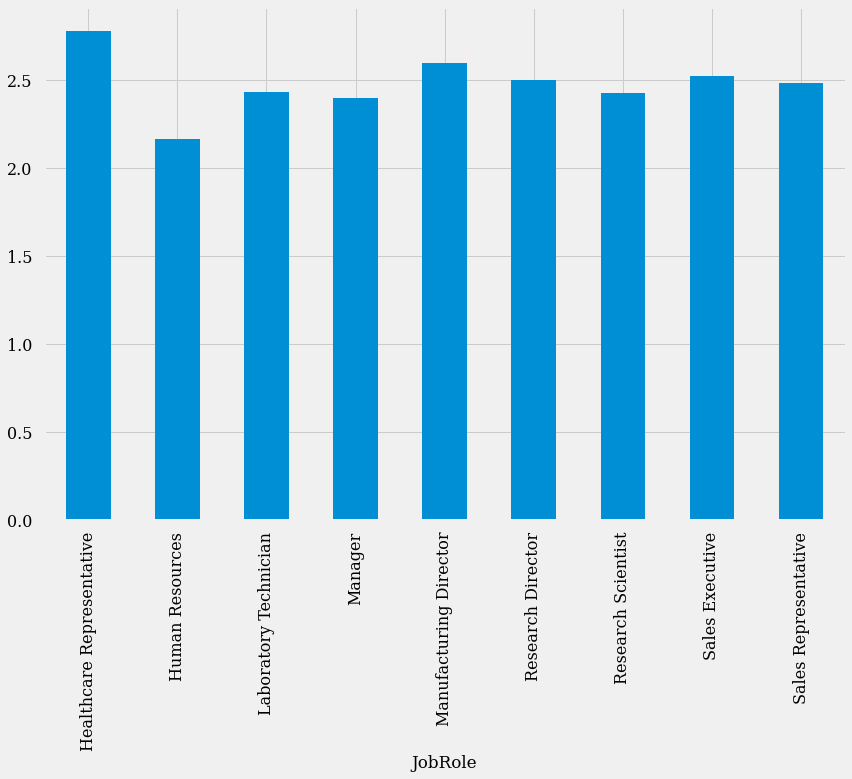

In [75]:
df3[df3.Attrition==1.0].groupby('JobRole')['JobSatisfaction'].agg('mean').plot(kind='bar')

<AxesSubplot:xlabel='JobRole'>

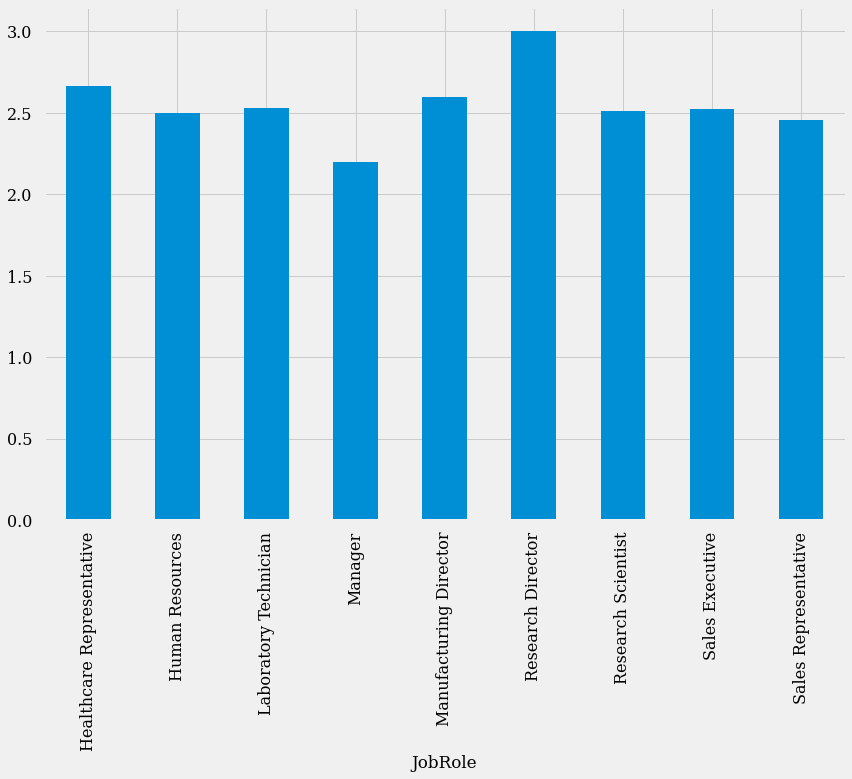

In [76]:
df3[df3.Attrition==1.0].groupby('JobRole')['JobInvolvement'].agg('mean').plot(kind='bar')

<AxesSubplot:xlabel='JobRole'>

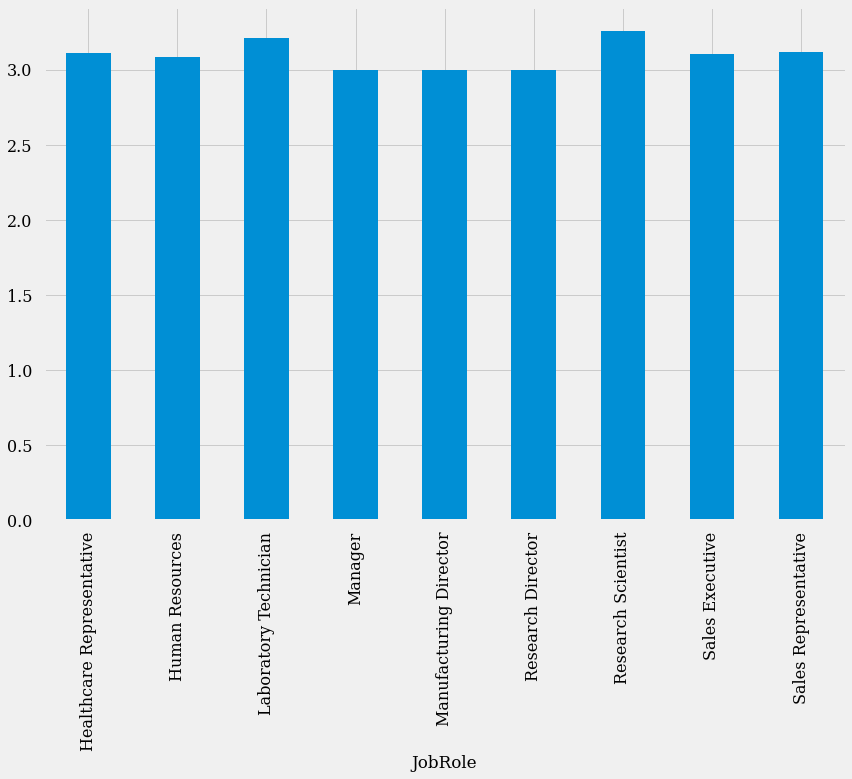

In [113]:
df3[df3.Attrition==1.0].groupby('JobRole')['PerformanceRating'].agg('mean').plot(kind='bar')

## 2nd Finding Conclusion:

<div class="alert alert-block alert-success"> 

* The majority of employees who leave the company are less than 40 years old.<br>
    
* As expected, employees who report low Job satisfaction contribute to attrition. However we also do see that there are employees who left the company reporting a high level of Job satisfaction as well.<br> 
    
* Comparing both the graphs, we can see that those who are still with the company has higher proportion of high to very high Job satisfaction compared to those who left the company. Those who left company show higher proportion of low to medium Job satisfaction.<br>
    
* Employees who report low Job involvement contribute to attrition. However we also do see that there are employees who left the company reporting a high level of Job Involvement.<br>
    
* Comparing both the graphs, we can see that those who are still with the company has higher proportion of high to very high Job involvement compared to those who left the company. Those who left company show higher proportion of low to medium Job involvement.<br>
    
* For the performance rating, we can see that the those who are still with the company are slightly higher propertion with very high rating compared to those who left the company.
    
* The Top 3 attrition rate by job role includes Sales Representative, Laboratory technician and Human Resources<br>
    
* By Job Role, Human Resources department has the lowest satisfaction rate<br>
* By Job Role, Managers department has the lowest involvement rate <br>
* By Job Role, the performance rating is more or less the same. <div>

## Suggestions and Managerial Insights:

1. Focus on employees within the Sales department working over time and those with low job satisfaction and job involvement ratings by increasing their pay to market, or adding a bonus structure to help retain them.

2. Focus on employees within the HR department & Laboratory who have low satisfaction rate amongst all departments by hiring additional employees to offload some of their routines or engage them in various kinds of activities that will not overburden them with too much of work.


# 3rd Finding: Narrowing down to attrition in departments


In [78]:
attr = df1[df1.Attrition==1]

In [79]:
attr['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

<AxesSubplot:ylabel='Department'>

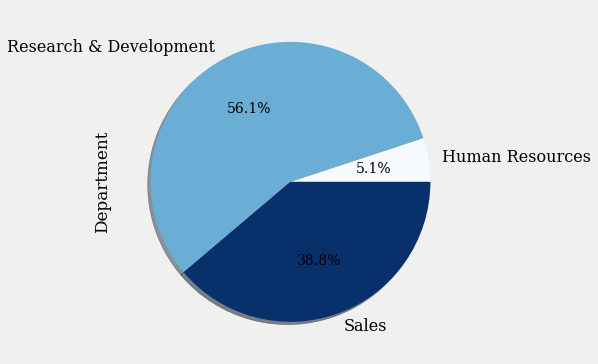

In [80]:
attr.groupby('Department')['Department'].count().\
            plot(kind='pie',figsize=(10,6),cmap="Blues", autopct='%1.1f%%', shadow=True)

Overall attrition rate at this company is 16.1%. Of the employees who resigned, 56.1% wokred in Research & Development, 38.8% in Sales, and only 5.1% in HR.

Since R&D attrition is the highest, let's look at what's going on there.

In [81]:
R_D_attr=attr[attr.Department=='Research & Development']

In [82]:
R_D_attr.JobSatisfaction.mean()

2.4586466165413534

<AxesSubplot:xlabel='Age', ylabel='Density'>

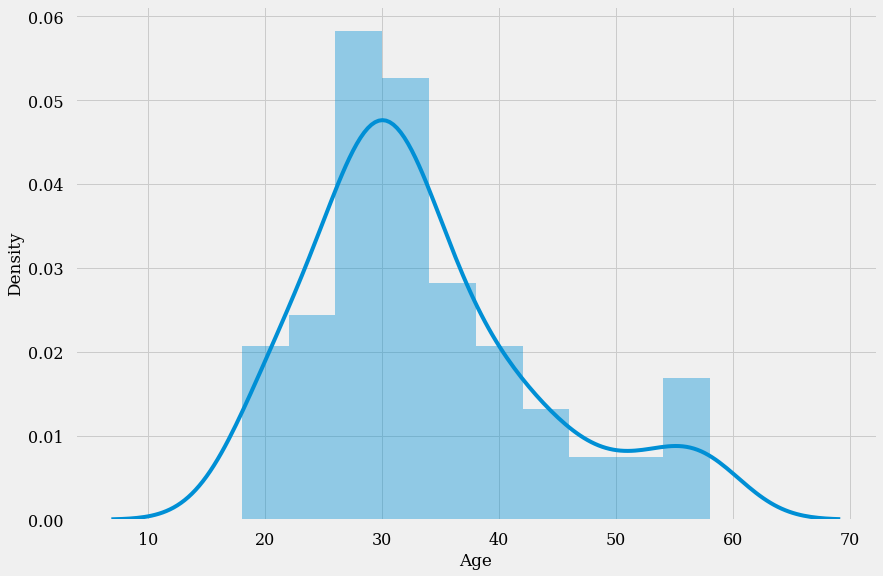

In [83]:
sns.distplot(R_D_attr.Age, bins=10)

As we can see, attrition is significantly higher among 30 year olds.

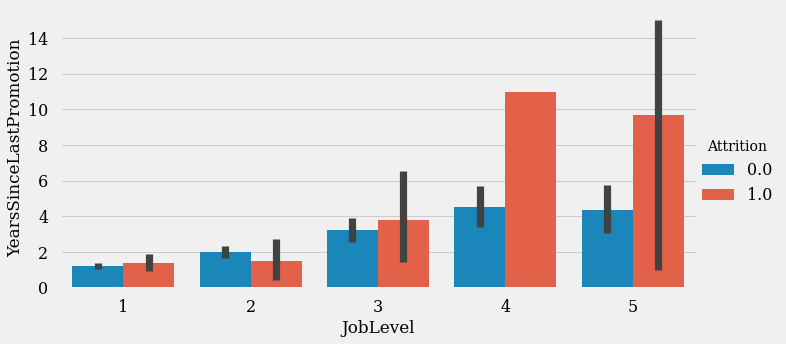

In [84]:
sns.catplot(x='JobLevel', y='YearsSinceLastPromotion',hue='Attrition', \
            data=df1[df1.Department=='Research & Development'], kind='bar', aspect=2)

The bar above shows that the time since last promotion is very high at higher job levels which significantly contributes to attrition. Management should review career paths and advancement opportunities for employees at higher levels.

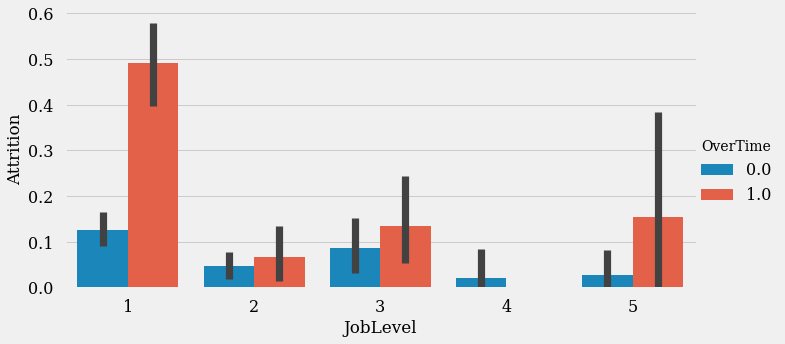

In [85]:
sns.catplot(x='JobLevel', y='Attrition',hue='OverTime', \
            data=df1[df1.Department=='Research & Development'], kind='bar', aspect=2)

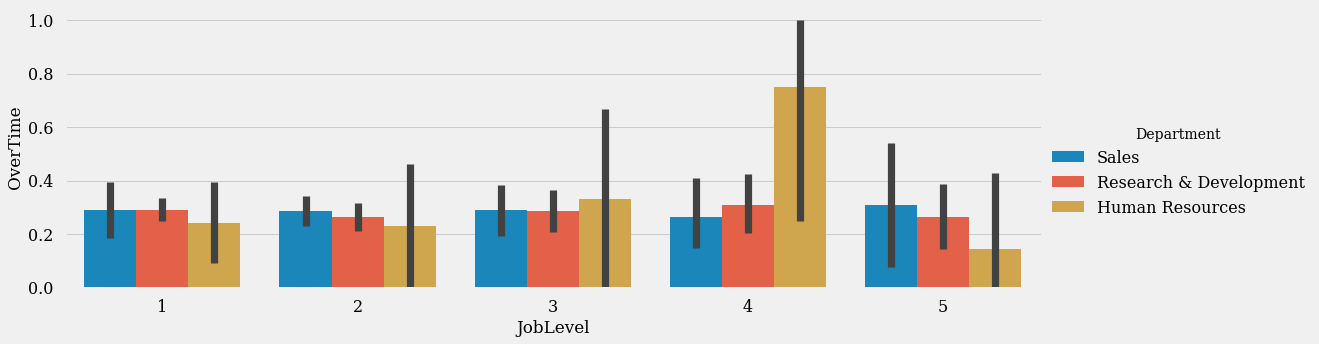

In [86]:
sns.catplot( y='OverTime',hue='Department', x='JobLevel', data=df1, kind='bar', aspect=3)

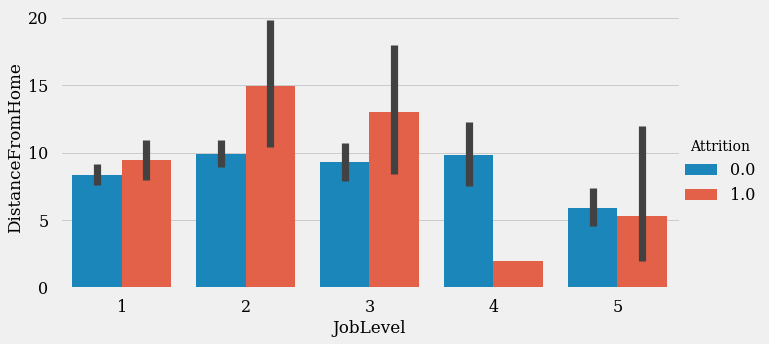

In [87]:
sns.catplot(hue='Attrition', y='DistanceFromHome',x='JobLevel', \
            data=df1[df1.Department=='Research & Development'], kind='bar', aspect=2)

Further distance from home and working overtime combined contributes to attrition of lower level employees. 

## 3rd Finding Conclusion:

<div class="alert alert-block alert-success"> 
* Attrition in R&D is higher than in the other departments <br>
* It is significantly higher among 30 year olds <br>
* The attrition in R&D is highest at the lowest level when they have to work overtime <br>
* Employees at the mid level have the highest attrition caused by the longest commute <div>


## Suggestions and Managerial Insights:

1. Management should review career paths and advancement opportunities for employees at higher levels.
2. For employees with longer commute we suggest reimbursing monthly commute expenses

# <span style="color:blue">**Classification for prediction**</span>

In [88]:
from sklearn.model_selection import train_test_split

Split original dataset into train set and test set.

In [89]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [92]:
y_pred = cl.predict(X_test)

In [93]:
cl.predict_proba(X_test)

array([[0.92, 0.08],
       [0.92, 0.08],
       [0.85, 0.15],
       [0.79, 0.21],
       [0.3 , 0.7 ],
       [0.61, 0.39],
       [0.75, 0.25],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.85, 0.15],
       [0.95, 0.05],
       [0.83, 0.17],
       [0.89, 0.11],
       [0.45, 0.55],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.82, 0.18],
       [0.91, 0.09],
       [0.83, 0.17],
       [0.87, 0.13],
       [0.62, 0.38],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.93, 0.07],
       [0.67, 0.33],
       [0.85, 0.15],
       [0.9 , 0.1 ],
       [0.87, 0.13],
       [0.45, 0.55],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.89, 0.11],
       [0.81, 0.19],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.88, 0.12],
       [0.92, 0.08],
       [0.76, 0.24],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.9 , 0.1 ],
       [0.8 , 0.2 ],
       [0.92, 0.08],
       [0.61, 0.39],
       [0.76, 0.24],
       [0.88,

In [94]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [95]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [96]:
confusion_matrix(Y_test,y_pred)

array([[369,   2],
       [ 58,  12]], dtype=int64)

### <span style="color:blue">**Accuracy**</span>

In [97]:
met.accuracy_score(Y_test, y_pred)

0.8639455782312925

### <span style="color:blue">**Precision**</span>


In [98]:
met.precision_score(Y_test,y_pred)

0.8571428571428571


### <span style="color:blue">**Recall**</span>

In [99]:
met.recall_score(Y_test,y_pred)

0.17142857142857143

### <span style="color:blue">**AUC_score**</span>

In [100]:
met.roc_auc_score(Y_test,y_pred_proba)

0.7709857527916827

AUC score looks in good shape. 

### Cross-validation

In [101]:
from sklearn.model_selection import KFold

In [102]:
nfolds = 10

In [103]:
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [105]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.6051256510686926
RandomForestClassifier(n_jobs=-1) 0.7994594326785484
GaussianNB() 0.7771230200783231
LogisticRegression(n_jobs=-1) 0.6971938068779086
DecisionTreeClassifier() 0.611406970657181
AdaBoostClassifier() 0.8380232979264356
QuadraticDiscriminantAnalysis() 0.7317898797503537
MLPClassifier() 0.6148273610890947
SVC() 0.5212404457045634
***********************************************
Best is... AdaBoostClassifier() 0.8380232979264356


Best model could be AdaBoost classificaiton which auc score is the highest 0.838.